In [134]:
# Importing necessary libraries 
import sys
import numpy as np
import emcee
import astropy.io.fits as pyfits
import matplotlib.pylab as pl
import random,os
from multiprocessing import Pool
from multiprocessing import cpu_count
import time
from astropy.io import ascii
import corner
from astropy.table import Column


In [135]:
ncpu = cpu_count()
print("{0} CPUs".format(ncpu))
os.environ["OMP_NUM_THREADS"] = "1"

12 CPUs


In [136]:
np.float = float    
np.int = int   #module 'numpy' has no attribute 'int'
np.object = object    #module 'numpy' has no attribute 'object'
np.bool = bool    #module 'numpy' has no attribute 'bool'

In [137]:
#data  BgVriY
file = 'B_sbfj21_update3.csv' # change the filaname here if needed for other bands or for other calibrators
tab = ascii.read('../data/working/'+file)


print(tab.columns)

<TableColumns names=('sn','zhel','zcmb','st','est','Mmax','eMmax','t0','EBVmw','eEBVmw','covMs','method','BV','eBV','covBV_M','host','dist','edist','kmag','ekmag','dsbf','ed','m','em','ml','mu','sample','subtype','quality','caltype','covBVs')>


In [138]:
c = 300000.
q=-0.53

In [139]:
if not 'SN2011iv' in tab['sn']:
    
    #B
    #tab.add_row({'sn':'SN2011iv','dist':31.453,'edist':0.084, 'st':0.699,'est':0.007,'Mmax':12.46, 'eMmax': 0.008,'covMs':1.171e-05,'covBV_M':6.4e-05 })
    #H
    tab.add_row({'sn':'SN2011iv', 'st':0.699,'est':0.007,'Mmax':12.78, 'eMmax': 0.033,'covMs':-3.753e-05,'covBV_M':0.0 })


#if not 'SN20016ajf' in tab['sn']: ## on g-band 
 #       tab.add_row({'sn':'SN2016ajf', 'st':0.493,'est':0.016,'Mmax':16.367, 'eMmax': 0.057, 'covMs':0.0,'covBV_M':0.0 })

    
    
    
    
#tab = ascii.read('../data/working/'+file)
st = tab['st']
est = tab['est']
zhel = tab['zhel']
zcmb = tab['zcmb']
mmax = tab['Mmax']
emmax = tab['eMmax']
bv = tab['BV']
ebv = tab['eBV']
m_csp = tab['m']
eml = (tab['m']-tab['ml'])
emu = (tab['mu']-tab['m'])
em = (emu+eml)/2.
dist = tab['dist']
edist = tab['edist']
c_ms = tab['covMs']
c_mbv = tab['covBV_M']
sn = tab['sn']

ebv_host = tab['EBVmw']

#adding more calibrators from Garnavich 2023
#1
c1 = np.where(sn =='SN2006mr') #31.200 ± 0.093
dist[c1]=31.2
edist[c1]=0.093
print(sn[c1],dist[c1])
#2
c2 = np.where(sn =='SN2007on') # 31.453 ± 0.084
dist[c2]=31.453
edist[c2]=0.084
print(sn[c2],dist[c2])
#3
c3 = np.where(sn =='SNhunt281')# 32.369,0.078 same as SN2015bp from Jensen 2021
dist[c3]=32.369
edist[c3]=0.078
print(sn[c3],dist[c3])

# #4 Add SN2011iv

c4 = np.where(sn =='SN2011iv')# # 31.453 ± 0.084
dist[c4]=31.453
edist[c4]=0.084
print(sn[c4],dist[c4])

c5 = np.where(sn =='SN2016ajf')# # 31.453 ± 0.084
dist[c5]=34.202
edist[c5]=0.106
print(sn[c5],dist[c5])


   sn   
--------
SN2006mr dist
----
31.2
   sn   
--------
SN2007on  dist 
------
31.453
    sn   
---------
SNhunt281  dist 
------
32.369
   sn   
--------
SN2011iv  dist 
------
31.453
    sn   
---------
SN2016ajf  dist 
------
34.202


In [140]:
#Selection

#selection = (tab['dist']<0) & (tab['st']<0.75)  & (tab['EBVmw']<0.15) & (tab['zcmb']>0.01)
#w0 = np.where(selection &  (tab['sn']!='CSP14abk') &  (tab['sn']!='PTF13dyt') &  (tab['sn']!='PTF13dym') & (tab['sn']!='PTF14yw') & (tab['sn']!='PS1-13eao') & (tab['subtype']!='Ia-SC') & (tab['subtype']!='Ia-02cx') & (tab['sn']!='LSQ14fmg')& (tab['sn']!='SN2004dt')& (tab['sn']!='SN2005gj')& (tab['sn']!='SN2005hk')& (tab['sn']!='SN2006bt')& (tab['sn']!='SN2006ot')& (tab['sn']!='SN2007so')& (tab['sn']!='SN2008ae')& (tab['sn']!='SN2008bd')& (tab['sn']!='SN2008ha')& (tab['sn']!='SN2008J')& (tab['sn']!='SN2009dc')& (tab['sn']!='SN2009J')& (tab['sn']!='SN2010ae'))
# no cut
#w0 = np.where((tab['sn']!='CSP14abk') &  (tab['sn']!='PTF13dyt') &  (tab['sn']!='PTF13dym') & (tab['sn']!='PTF14yw') & (tab['sn']!='PS1-13eao') & (tab['subtype']!='Ia-SC') & (tab['subtype']!='Ia-02cx') & (tab['sn']!='LSQ14fmg')& (tab['sn']!='SN2004dt')& (tab['sn']!='SN2005gj')& (tab['sn']!='SN2005hk')& (tab['sn']!='SN2006bt')& (tab['sn']!='SN2006ot')& (tab['sn']!='SN2007so')& (tab['sn']!='SN2008ae')& (tab['sn']!='SN2008bd')& (tab['sn']!='SN2008ha')& (tab['sn']!='SN2008J')& (tab['sn']!='SN2009dc')& (tab['sn']!='SN2009J')& (tab['sn']!='SN2010ae') & (tab['dist']<0))
#w1 = np.where((tab['dist']>0) & (tab['st']<0.75) & (tab['EBVmw']<0.15))
#w1 = np.where(tab['dist']>0)


# Mark's list for B-band 
supernovae = Column([
    "SN2005bl", "SN2006bd", "SN2006gt", "SN2006ob", "SN2007al",
    "SN2007mm", "SN2007ol", "SN2007ux", "SN2008R", "SN2009F",
    "CSP13aao", "KISS15m", "LSQ11pn", "LSQ12fvl", "LSQ13dkp",
    "LSQ14act", "LSQ14ajn", "LSQ14ip", "LSQ14jp", "PTF13ebh",
    "PTF14w", "SN2011jn", "SN2012ij", "SN2013ay"
], name="Supernovae")



w0=[]

supernova_array = np.array(supernovae)
new_array = np.array(sn)
print(len(supernova_array))

# Find indices of matching entries from supernova_column in new_column
match = np.array([np.where(new_array == name)[0][0] if name in new_array else -1 for name in supernova_array])

for name, idx in zip(supernova_array, match):
    if idx != -1:
        print(f"{name} found at index {idx} in new_column")
        
        w0.append(idx)
    else:
        print(f"{name} not found in new_column")
        

### Calibrators B          
calibrators = Column([
    "SN2007cv",
    "SN2008hs",
    "SN2010Y",
    "SN2014bv",
    "SN2016ajf",
    "SN2006mr",
    "SN2007on",
    "SN2008R",
    "SN2011iv",
    "PTF13ebh",
    "CSP15aae",
    "SNhunt281"
],name='Calibrators') 




w1=[]

calibrators_array = np.array(calibrators)
print(len(calibrators_array))

# Find indices of matching entries from supernova_column in new_column
match = np.array([np.where(new_array == name)[0][0] if name in new_array else -1 for name in calibrators_array])

for name, idx in zip(calibrators_array, match):
    if idx != -1:
        print(f"{name} found at index {idx} in new_column")
        
        w1.append(idx)
    else:
        print(f"{name} not found in new_column")
         
        
        
        
        
print (len(st[w0]),len(st[w1]))

print(sn[w0])
print(sn[w1])


24
SN2005bl found at index 184 in new_column
SN2006bd found at index 202 in new_column
SN2006gt found at index 212 in new_column
SN2006ob found at index 219 in new_column
SN2007al found at index 226 in new_column
SN2007mm found at index 242 in new_column
SN2007ol found at index 244 in new_column
SN2007ux found at index 248 in new_column
SN2008R found at index 252 in new_column
SN2009F found at index 280 in new_column
CSP13aao found at index 47 in new_column
KISS15m found at index 66 in new_column
LSQ11pn found at index 70 in new_column
LSQ12fvl found at index 79 in new_column
LSQ13dkp found at index 100 in new_column
LSQ14act found at index 108 in new_column
LSQ14ajn found at index 112 in new_column
LSQ14ip found at index 127 in new_column
LSQ14jp found at index 128 in new_column
PTF13ebh found at index 152 in new_column
PTF14w found at index 160 in new_column
SN2011jn found at index 295 in new_column
SN2012ij found at index 310 in new_column
SN2013ay found at index 319 in new_column
1

In [141]:
# Eqn 9 of Bruns 2018
def distmod(h,z1,z2):
    t1 = (1+z1)/(1+z2)
    t2 = (c*z2)/h
    t3 = 1 + (((1-q)/2)*z2)
    return (5*np.log10(t1*t2*t3)) +25


In [142]:
# Liklihood function
def like(par):
    p0,beta,sig,h0 = par

    mu_obs=[]
    mu_model=[]
    mu_stat=[]
    
    if -25<p0<-15 and -10.0<beta<10.0 and  0.<sig<1. and 0< h0 < 1000.0: # priors
        

        
        mu_sn = mmax[w0]-p0-beta*(bv[w0] - 0.4) 

        mu_cal = mmax[w1]-p0-beta*(bv[w1] - 0.4) 
        
        for mu_sn in mu_sn:
            mu_obs.append(mu_sn)
        for mu_cal in mu_cal:
            mu_obs.append(mu_cal)
        mu_model_sn = distmod(h0,zhel[w0],zcmb[w0])
        mu_model_cal = dist[w1]
        for mu_model_sn in mu_model_sn:
            mu_model.append(mu_model_sn)
        for mu_model_cal in mu_model_cal:
            mu_model.append(mu_model_cal)
        
        
        #velterm = (2.17*437.0)**2/(c*zcmb)**2
        vel = 300

        err = (emmax[w0]**2) +(beta*ebv[w0])**2+(beta*c_mbv[w0])+sig**2+(0.00000723*vel/zcmb[w0])**2
        err1 = (emmax[w1]**2) +(beta*ebv[w1])**2+(beta*c_mbv[w1])+sig**2+(edist[w1]**2)

       

        for err in err:
            mu_stat.append(err)
        for err1 in err1:
            mu_stat.append(err1)
        mu_stat=np.sqrt(mu_stat)

        mu_obs = np.array(mu_obs)
        mu_model = np.array(mu_model)
        mu_stat = np.array(mu_stat)
        dmu=mu_obs-mu_model
        
        chi =np.sum((dmu)**2/mu_stat**2)
        return -0.5*chi - (0.5*np.sum(np.log(2*np.pi*(mu_stat)**2))) 
    else:
        return -np.inf

In [143]:
#initial guess
plim=-17, -20
p1lim =-10,20
p2lim = -20,20
betalim =-5,5
siglim=0,1
h0lim= 50.0,100

# EMCEE
ndim, nwalkers = 4, 40
ssize=3000
burnin = 500


p00 = np.random.rand(nwalkers) * (plim[1] - plim[0]) + plim[0]
beta0 = np.random.rand(nwalkers) * (betalim[1] - betalim[0]) + betalim[0]
sig0 = np.random.rand(nwalkers) * (siglim[1] - siglim[0]) + siglim[0]
h00 = np.random.rand(nwalkers) * (h0lim[1] - h0lim[0]) + h0lim[0]

#p0 = zip(*[p00,p10,p20,rv0,alpha0,sig0,vel0,h00])
p0 = np.array([p00,beta0,sig0,h00]).T


In [144]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, like)
print ("running mcmc on "+file)
start = time.time()
sampler.run_mcmc(p0,ssize,progress=True)
samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))
end = time.time()
serial_time = end - start
print ("Mean acceptance fraction:", np.mean(sampler.acceptance_fraction))

running mcmc on B_sbfj21_update3.csv


100%|██████████| 3000/3000 [01:52<00:00, 26.76it/s]

Mean acceptance fraction: 0.5892416666666668


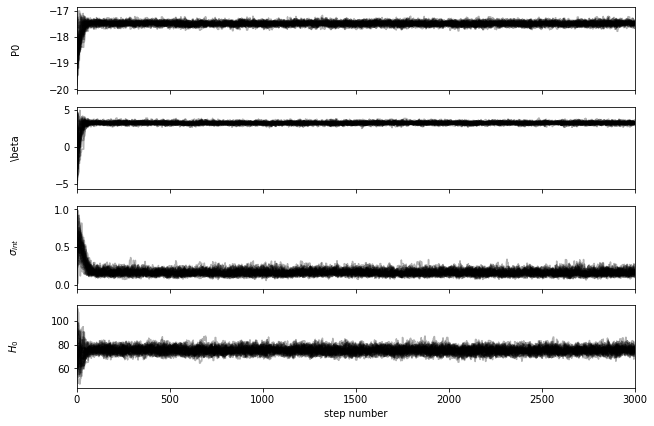

In [145]:
# Chains
fig, axes = pl.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["P0",r"\beta",r"$\sigma_{int}$", r"$H_0$"]
for j in range(ndim):
    ax = axes[j]
    ax.plot(samples[:, :, j], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[j])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

fig.savefig("../results/colormethod/"+file[:-4]+"_chainsbeta.pdf")

In [146]:
samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))
#tau = sampler.get_autocorr_time()
#print(tau)

 # Printing results
for i, name in enumerate(labels):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    print(f"{name}: {mcmc[1]:.3f} (+{q[1]:.3f}/-{q[0]:.3f})")
    
    
 



P0: -17.482 (+0.067/-0.067)
\beta: 3.230 (+0.151/-0.153)
$\sigma_{int}$: 0.159 (+0.035/-0.029)
$H_0$: 75.331 (+2.504/-2.460)


In [147]:
# Writing Result
P0,beta_mcmc,sig_mcmc, H0_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))



#f1 =open('../results/colormethod/'+file[:-4]+'_result_colorbeta.txt','w') ### MUST change !!

#f1.write('%s\t%s\t%s\t%s\t%s\n'%('p0','p1','p2','sig_int','H0'))

#f1.write('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\n'%(p0_mcmc[0],p1_mcmc[0],p2_mcmc[0],sig_mcmc[0],H0_mcmc[0]))

#f1.write('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\n'%(p0_mcmc[1],p1_mcmc[1],p2_mcmc[1],sig_mcmc[1],H0_mcmc[1]))
#f1.write('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\n'%(p0_mcmc[2],p1_mcmc[2],p2_mcmc[2],sig_mcmc[2],H0_mcmc[2]))

#f1.close()

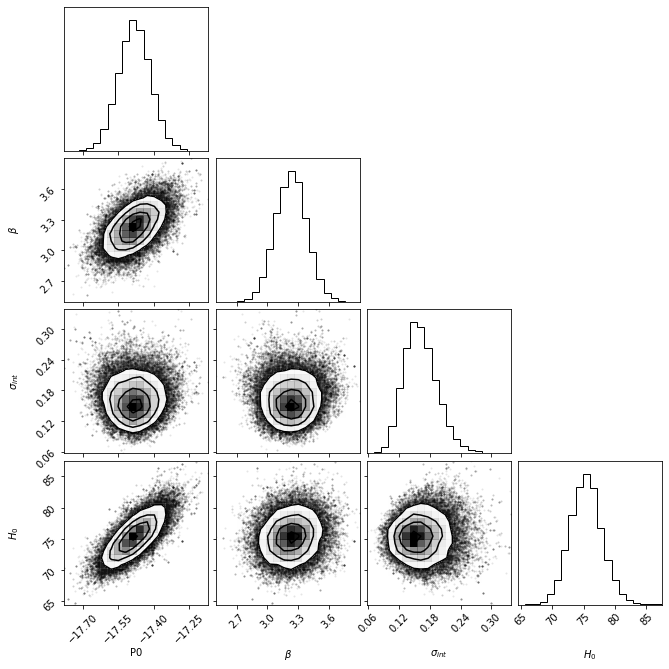

In [148]:
# Triangle plot

figure = corner.corner(samples, labels = [ "P0",r"$\beta$",r"$\sigma_{int}$", r"$H_0$"])
figure.savefig("../results/colormethod/"+file[:-4]+"_4par_color"+str(nwalkers)+"_"+str(ssize)+"beta.pdf")
